In [36]:
import pandas as pd

# 读取Excel文件
file_path = 'E:/bristol graduation project\MOF_sys_database.xlsx'  # 替换为你的文件路径
df = pd.read_excel(file_path)

In [37]:
# 查看前几行数据，确保数据读取正确
print(df.head())

       filename Metal  temperature tem_unit  time time_unit  solvent1  \
0  QUQFIS_clean    Zn           65        ℃    24         h       962   
1  PUWDAM_clean    Zn           70        ℃    72         h       962   
2  RUGZAW_clean    Zn           70        ℃    72         h       962   
3  YAVWUQ_clean    Cu           70        ℃    96         h      6228   
4  LELROL_clean    Mn           70        ℃   192         h      6228   

   solvent2  solvent3  additive1  additive2  additive3  
0    6228.0     887.0        NaN        NaN        NaN  
1    6228.0     702.0        NaN        NaN        NaN  
2    6228.0     702.0        NaN        NaN        NaN  
3       NaN       NaN      313.0        NaN        NaN  
4     887.0       NaN        NaN        NaN        NaN  


In [38]:
df.Metal.value_counts()

Zn    32
Cu    13
Mn     5
Cd     5
Eu     5
Co     5
Tb     4
In     4
Mg     3
V      2
Gd     2
Ni     1
As     1
Yb     1
Fe     1
Name: Metal, dtype: int64

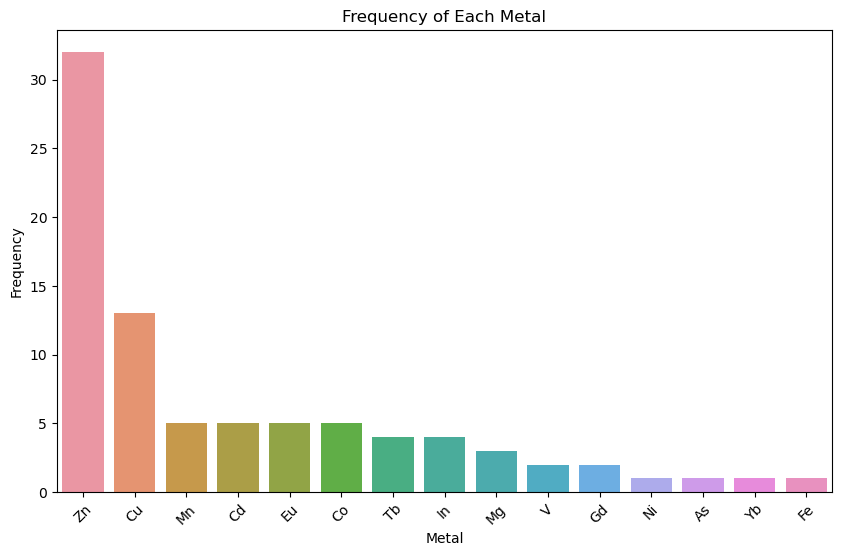

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 df 已经包含数据，并且 Metal 列已经统计过
# 例如：df = pd.read_excel('your_file.xlsx')
# 然后计算金属的频率
metal_counts = df['Metal'].value_counts()

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(x=metal_counts.index, y=metal_counts.values)

# 添加标题和标签
plt.title('Frequency of Each Metal')
plt.xlabel('Metal')
plt.ylabel('Frequency')

# 显示图表
plt.xticks(rotation=45)  # 如果金属名称较长，可以旋转x轴标签
plt.show()

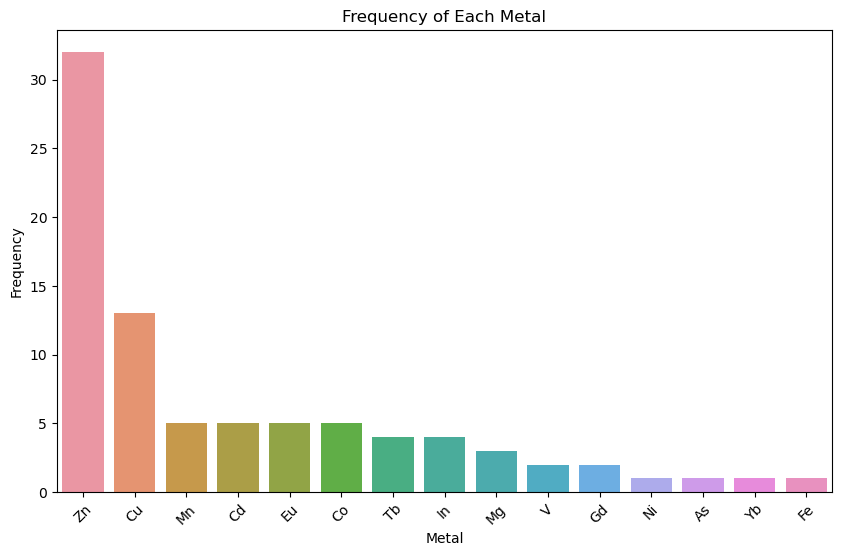

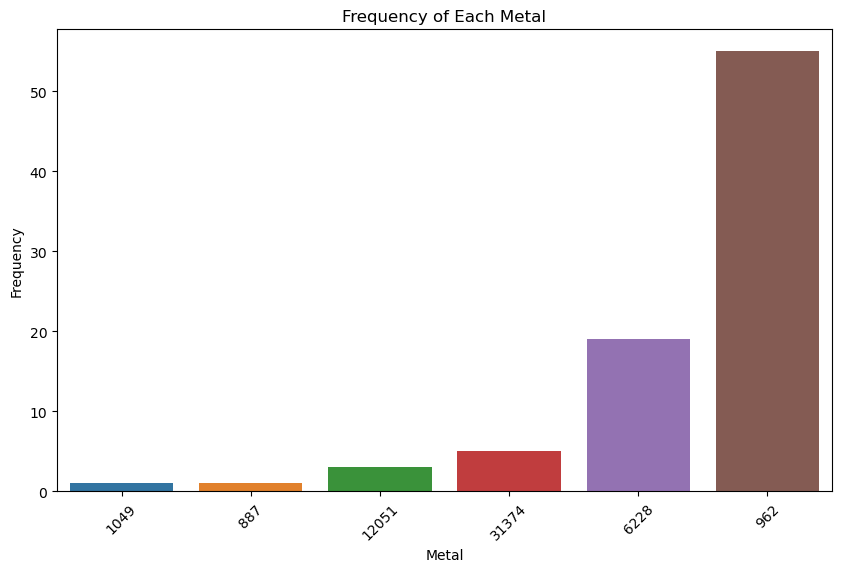

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


metal_counts = df['Metal'].value_counts()

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(x=metal_counts.index, y=metal_counts.values)

# 添加标题和标签
plt.title('Frequency of Each Metal')
plt.xlabel('Metal')
plt.ylabel('Frequency')

# 显示图表
plt.xticks(rotation=45)  # 如果金属名称较长，可以旋转x轴标签
plt.show()
# 假设 df 已经包含数据，并且 Metal 列已经统计过
# 例如：df = pd.read_excel('your_file.xlsx')
# 然后计算金属的频率
metal_counts = df["solvent1"].value_counts()

# 对金属频率按正序排序
metal_counts = metal_counts.sort_values(ascending=True)

# 创建一个带有排序顺序的分类类型
sorted_index = pd.Categorical(metal_counts.index, categories=metal_counts.index)

# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_index, y=metal_counts.values)

# 添加标题和标签
plt.title('Frequency of Each Metal')
plt.xlabel('Metal')
plt.ylabel('Frequency')

# 显示图表
plt.xticks(rotation=45)  # 如果金属名称较长，可以旋转x轴标签
plt.show()


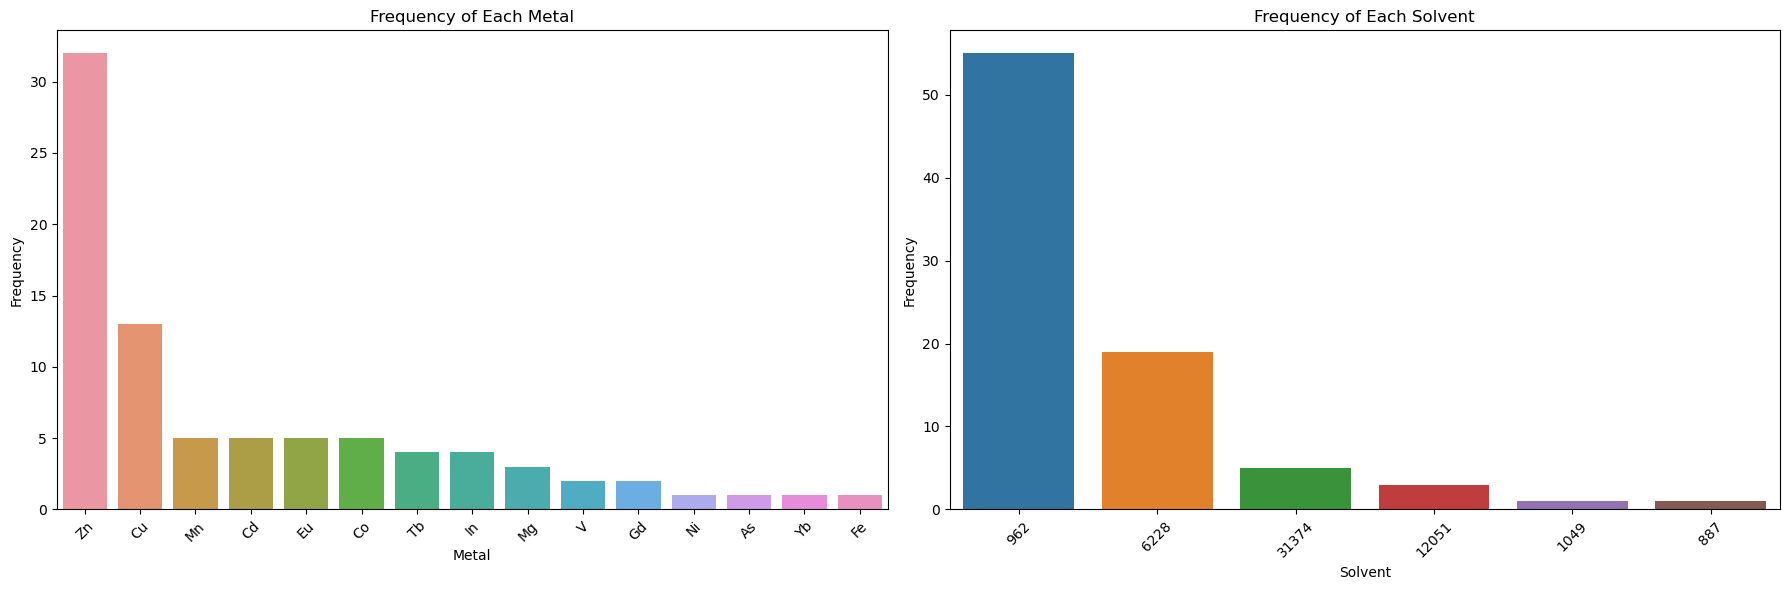

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 第一个条形图数据
metal_counts = df['Metal'].value_counts()

# 第二个条形图数据
solvent_counts = df["solvent1"].value_counts()

# 创建一个带有排序顺序的分类类型
sorted_index = pd.Categorical(solvent_counts.index, categories=solvent_counts.index)

# 创建子图
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1行2列的子图

# 绘制第一个条形图
sns.barplot(x=metal_counts.index, y=metal_counts.values, ax=axs[0])
axs[0].set_title('Frequency of Each Metal')
axs[0].set_xlabel('Metal')
axs[0].set_ylabel('Frequency')
axs[0].tick_params(axis='x', rotation=45)

# 绘制第二个条形图
sns.barplot(x=sorted_index, y=solvent_counts.values, ax=axs[1])
axs[1].set_title('Frequency of Each Solvent')
axs[1].set_xlabel('Solvent')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', rotation=45)

# 调整布局并显示图表
plt.tight_layout()
plt.savefig('frequency_of_each_solvent.png')
plt.show()

In [42]:
# 使用 pd.cut 将数据根据温度分组
df['Temperature Group'] = pd.cut(df['temperature'], bins=[65, 120, 170], labels=['65-120', '120-170'])

# 查看新的 DataFrame
print(df.head())

       filename Metal  temperature tem_unit  time time_unit  solvent1  \
0  QUQFIS_clean    Zn           65        ℃    24         h       962   
1  PUWDAM_clean    Zn           70        ℃    72         h       962   
2  RUGZAW_clean    Zn           70        ℃    72         h       962   
3  YAVWUQ_clean    Cu           70        ℃    96         h      6228   
4  LELROL_clean    Mn           70        ℃   192         h      6228   

   solvent2  solvent3  additive1  additive2  additive3 Temperature Group  
0    6228.0     887.0        NaN        NaN        NaN               NaN  
1    6228.0     702.0        NaN        NaN        NaN            65-120  
2    6228.0     702.0        NaN        NaN        NaN            65-120  
3       NaN       NaN      313.0        NaN        NaN            65-120  
4     887.0       NaN        NaN        NaN        NaN            65-120  


In [43]:
# 按照温度组和溶剂进行分组并统计
solvent_distribution = df.groupby('Temperature Group')['solvent1'].value_counts().unstack(fill_value=0)

# 查看结果
print(solvent_distribution)

solvent1           887    962    1049   6228   12051  31374
Temperature Group                                          
65-120                 1     34      0     17      3      5
120-170                0     20      1      2      0      0


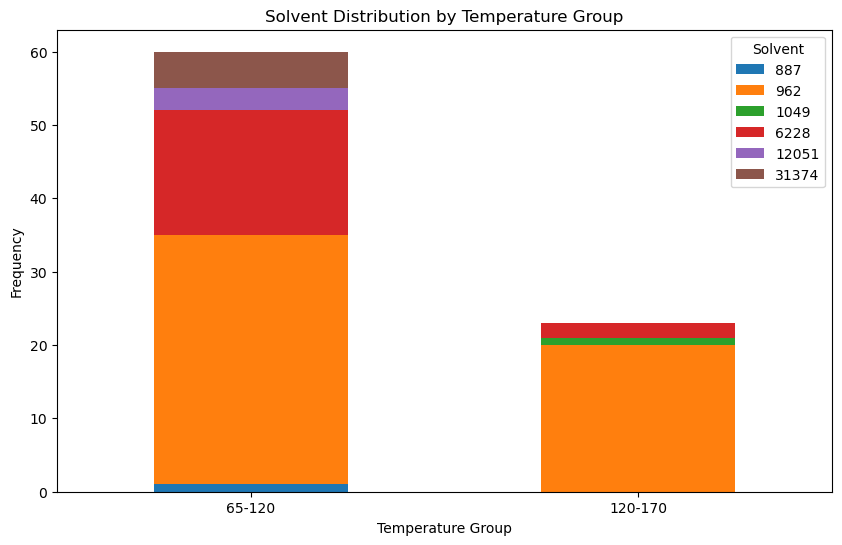

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制条形图
solvent_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))

# 添加标题和标签
plt.title('Solvent Distribution by Temperature Group')
plt.xlabel('Temperature Group')
plt.ylabel('Frequency')
plt.legend(title='Solvent')
plt.xticks(rotation=0)
plt.savefig('SolventDistribution_Temperature.png')
plt.show()

In [45]:
# 按照温度组和溶剂进行分组并统计
solvent_distribution = df.groupby('Temperature Group')['additive1'].value_counts().unstack(fill_value=0)

# 查看结果
print(solvent_distribution)

additive1          176.0    222.0    313.0    944.0    1004.0   8471.0   \
Temperature Group                                                         
65-120                   0        0        5        9        0        0   
120-170                  1        1        3        3        1        1   

additive1          14798.0  28118.0  
Temperature Group                    
65-120                   0        6  
120-170                  3        0  


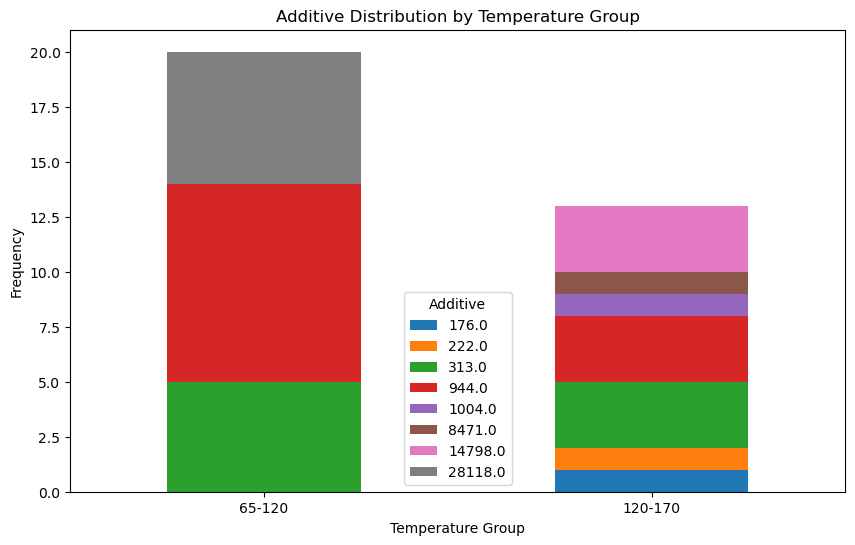

In [47]:
solvent_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))

# 添加标题和标签
plt.title('Additive Distribution by Temperature Group')
plt.xlabel('Temperature Group')
plt.ylabel('Frequency')
plt.legend(title='Additive')
plt.xticks(rotation=0)
plt.savefig('AdditiveDistribution_Temperature Group.png')
plt.show()